In [31]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
plt.rcParams.update(
    {
        "font.size": 10,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsfonts}\usepackage{bm}",
    }
)
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["font.sans-serif"] = ["Computer Modern"]
plt.rcParams["font.monospace"] = ["Computer Modern"]
plt.rcParams["pgf.texsystem"] = "xelatex"  # o 'lualatex'

plt.rcParams["figure.figsize"] = (16, 9)
fontsize = 28
matplotlib.rcParams.update({"font.size": fontsize})

In [33]:
# Get all file names in current folder
files = os.listdir("imagenet")

In [34]:
# Concatenate all dataframes in a single one
a = []
for f in files:
    if f.endswith(".csv"):
        a.append(pd.read_csv("imagenet/" + f))
df = pd.concat(a)

In [35]:
df["method"].unique()

array(['ella', 'fmgp', 'map', 'mfvi'], dtype=object)

In [36]:
resnets = ["resnet18", "resnet34", "resnet50", "resnet101", "resnet152"]
models = ["fmgp", "mfvi", "ella", "map"]
labels = ["FMGP", "MFVI", "ELLA", "MAP"]
print("Resnet models: ", resnets)
print("Models: ", models)

Resnet models:  ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
Models:  ['fmgp', 'mfvi', 'ella', 'map']


In [37]:
def std(x):
    return np.std(x) / len(x)

In [38]:
# Group by "method" and "resnet" and compute average and std
df = df.groupby(["model", "method"]).agg(["mean", std])

In [39]:
df[
    [
        ("NLL", "mean"),
        ("NLL", "std"),
        ("ECE", "mean"),
        ("ECE", "std"),
        ("train_time", "mean"),
        ("train_time", "std"),
        ("test_time", "mean"),
        ("test_time", "std"),
    ]
]

NLL                     ECE              train_time  \
                      mean           std      mean       std          mean   
model     method                                                             
resnet101 ella    0.912766  9.311914e-05  0.047584  0.000076  44637.214100   
          fmgp    0.900155  1.748639e-04  0.030087  0.001064  26542.694957   
          map     0.911810  0.000000e+00  0.049231  0.000000      0.000000   
resnet152 ella    0.877070  1.951247e-05  0.048416  0.000011  68203.005503   
          fmgp    0.864967  1.068885e-03  0.023706  0.001002  29735.040757   
          map     0.876225  3.700743e-17  0.050046  0.000000      0.000000   
resnet18  ella    1.248071  7.954060e-05  0.025406  0.000047   7890.451354   
          fmgp    1.247731  1.155955e-03  0.015237  0.000870  18351.291545   
          map     1.246926  0.000000e+00  0.026294  0.000000      0.000000   
          mfvi    1.242008  2.903075e-04  0.040468  0.000494  76018.503219   
resnet34  ella    1.082203  8.323727e-05  0.034207  0.000059  12015.817003   
          fmgp    1.076738  2.995346e-04  0.016073  0.000242  19415.658077   
          map     1.080981  0.000000e+00  0.035417  0.000000      0.000000   
resnet50  ella    0.962211  4.537714e-05  0.035884  0.000041  29973.901404   
          fmgp    0.957809  1.134313e-03  0.017528  0.000672  25429.933897   
          map     0.961574  3.700743e-17  0.036877  0.000000      0.000000   

                                  test_time              
                          std          mean         std  
model     method                                         
resnet101 ella    1648.678644   2807.590938    0.283369  
          fmgp      63.571492   1134.230162    1.452296  
          map        0.000000    505.857563    0.571644  
resnet152 ella     526.266795   3876.678473    6.935453  
          fmgp      68.697772   1266.700273    1.574509  
          map        0.000000    632.428904    0.448560  
resnet18  ella     275.365658    806.041733    9.538200  
          fmgp      98.705804    732.436048    1.231311  
          map        0.000000    505.883228   28.872561  
          mfvi      32.495120  37734.503668  307.786247  
resnet34  ella     373.211282   1086.686614   18.234648  
          fmgp     102.498175    856.332464   10.938447  
          map        0.000000    508.830139    3.762208  
resnet50  ella    1214.551728   1953.510268   18.347577  
          fmgp      45.811196   1099.984979    9.869022  
          map        0.000000    495.415500   10.087012

C:\Users\Ludvins\AppData\Local\Temp\ipykernel_36116\1132530035.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0][0].set_xticklabels(tkcs, fontsize=fontsize - 4)
C:\Users\Ludvins\AppData\Local\Temp\ipykernel_36116\1132530035.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0][1].set_xticklabels(tkcs, fontsize=fontsize - 4)
C:\Users\Ludvins\AppData\Local\Temp\ipykernel_36116\1132530035.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0][2].set_xticklabels(tkcs, fontsize=fontsize - 4)
C:\Users\Ludvins\AppData\Local\Temp\ipykernel_36116\1132530035.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1][0].set_xticklabels(t

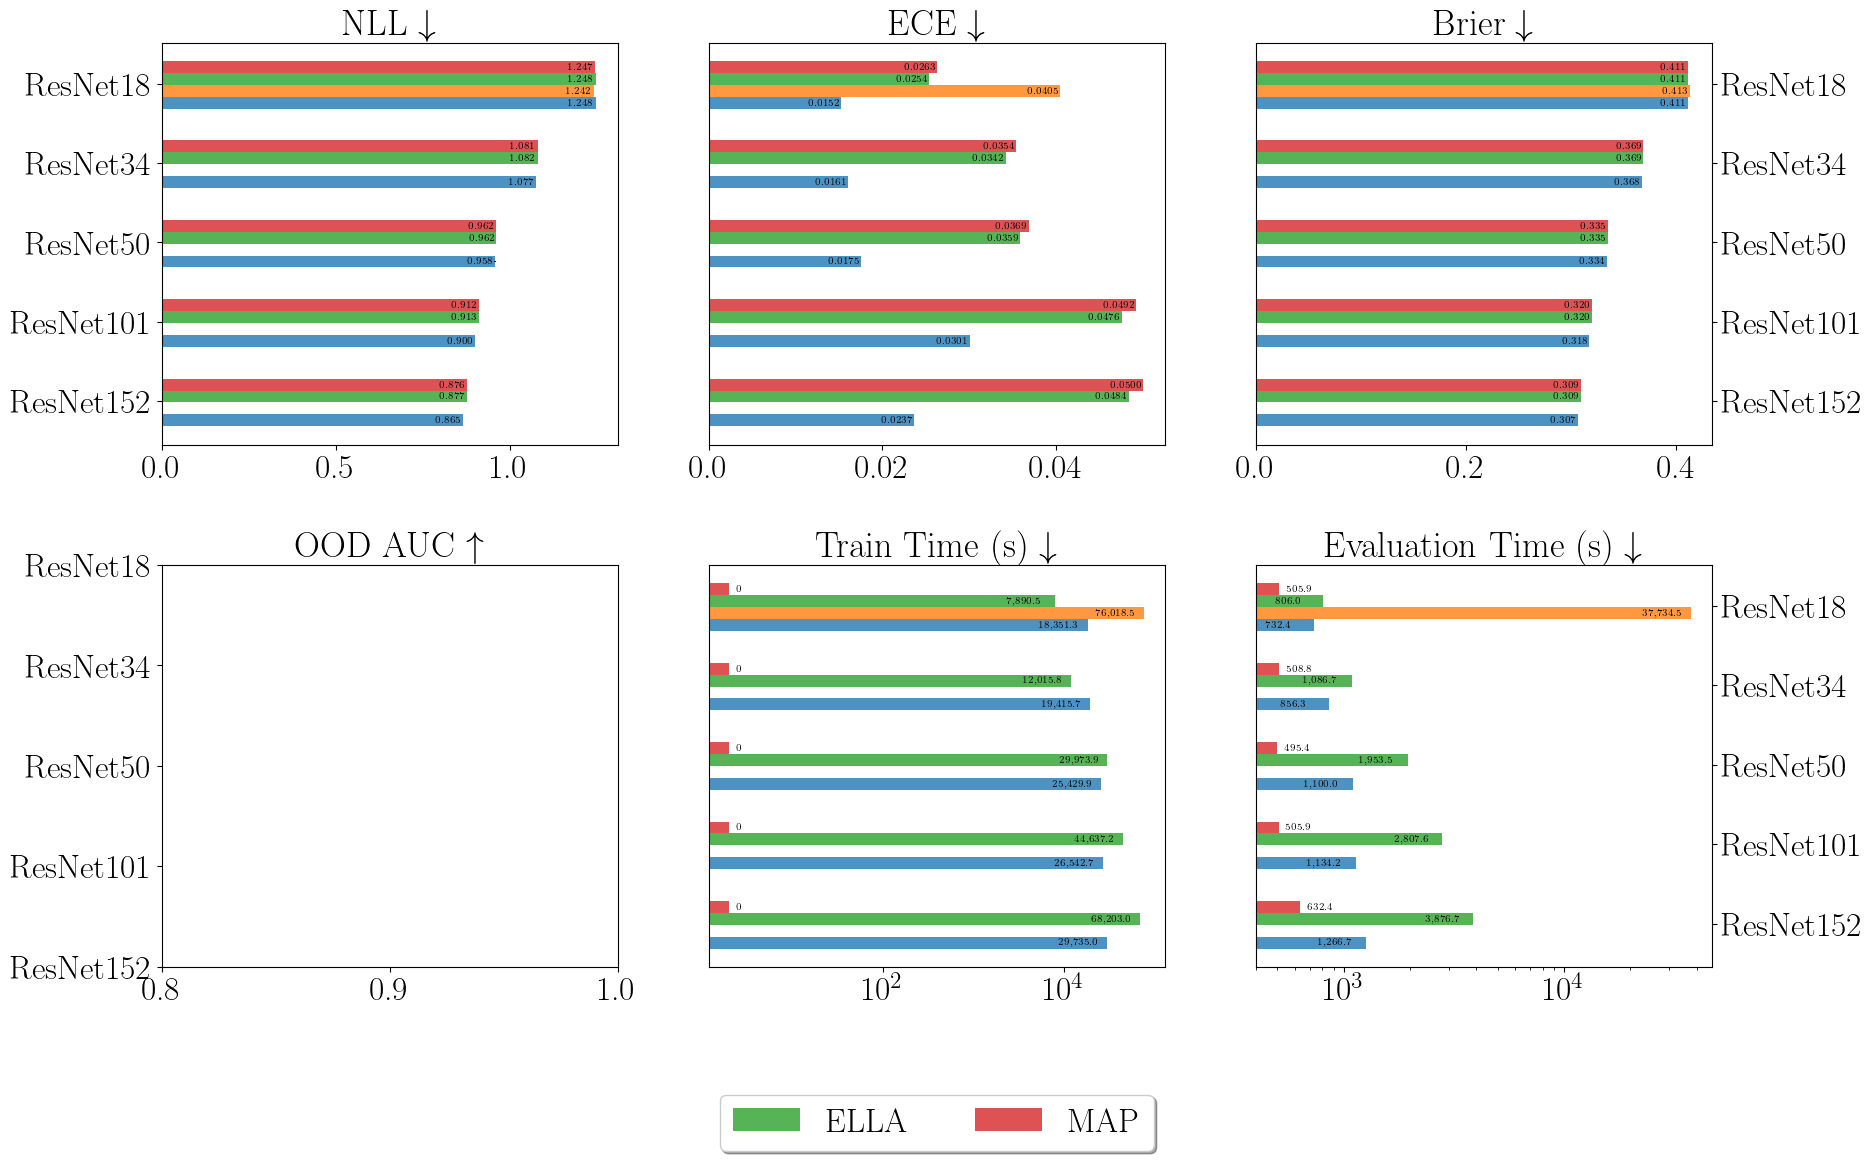

In [40]:
fig, axis = plt.subplots(2, 3, figsize=(20, 12))
width = 1.8
width_bar = width / 6
jet = plt.colormaps["tab10"]

for i, resnet in enumerate(resnets[::-1]):
    i = 2 * i
    for j, model in enumerate(models):
        try:
            bar = axis[0][0].barh(
                i + width_bar * (j - 1.6),
                df.loc[(resnet, model), "NLL"]["mean"],
                yerr=df.loc[(resnet, model), "NLL"]["std"],
                label=labels[j] if i == 0 else None,
                color=jet(j),
                alpha=0.8,
                height=width_bar,
            )
            axis[0][0].bar_label(
                bar,
                fmt="{:,.3f}",
                label_type="edge",
                padding=-20,
                fontsize=fontsize - 21,
            )

            bar = axis[0][1].barh(
                i + width_bar * (j - 1.6),
                df.loc[(resnet, model), "ECE"]["mean"],
                yerr=df.loc[(resnet, model), "ECE"]["std"],
                label=labels[j] if i == 0 else None,
                color=jet(j),
                alpha=0.8,
                height=width_bar,
            )
            axis[0][1].bar_label(
                bar,
                fmt="{:,.4f}",
                label_type="edge",
                padding=-24,
                fontsize=fontsize - 21,
            )

            bar = axis[0][2].barh(
                i + width_bar * (j - 1.6),
                df.loc[(resnet, model), "BRIER"]["mean"],
                yerr=df.loc[(resnet, model), "BRIER"]["std"],
                label=labels[j] if i == 0 else None,
                color=jet(j),
                alpha=0.8,
                height=width_bar,
            )
            axis[0][2].bar_label(
                bar,
                fmt="{:,.3f}",
                label_type="edge",
                padding=-20,
                fontsize=fontsize - 21,
            )

            bar = axis[1][1].barh(
                i + width_bar * (j - 1.6),
                df.loc[(resnet, model), "train_time"]["mean"] if model != "map" else 2,
                # yerr=df.loc[(resnet, model), "train_time"]["std"],
                label=labels[j] if i == 0 and model != "fmgp" else None,
                color=jet(j),
                alpha=0.8,
                height=width_bar,
            )
            axis[1][1].bar_label(
                bar,
                fmt="{:,.1f}",
                labels="0" if model == "map" else None,
                label_type="edge",
                padding=5 if model in ["map"] else -35,
                fontsize=fontsize - 21,
            )

            bar = axis[1][2].barh(
                i + width_bar * (j - 1.6),
                df.loc[(resnet, model), "test_time"]["mean"],
                # yerr=df.loc[(resnet, model), "test_time"]["std"],
                label=labels[j] if i == 0 and model != "fmgp slow" else None,
                color=jet(j),
                alpha=0.8,
                height=width_bar,
            )
            axis[1][2].bar_label(
                bar,
                fmt="{:,.1f}",
                label_type="edge",
                padding=5 if model in ["map"] else -35,
                fontsize=fontsize - 21,
            )
        except:
            continue
axis[0][0].set_yticks([0, 2, 4, 6, 8])
axis[0][0].set_yticklabels(
    ["ResNet152", "ResNet101", "ResNet50", "ResNet34", "ResNet18"],
    fontsize=fontsize - 4,
)
# axis[0][0].set_xticks([0.7, 0.8, 0.9, 1, 1.1])
tkcs = axis[0][0].get_xticks()
axis[0][0].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[0][1].set_yticks([])
tkcs = axis[0][1].get_xticks()
axis[0][1].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[0][2].set_yticks([])
axis[0][2].yaxis.tick_right()
axis[0][2].set_yticks([0, 2, 4, 6, 8])
axis[0][2].set_yticklabels(
    ["ResNet152", "ResNet101", "ResNet50", "ResNet34", "ResNet18"],
    fontsize=fontsize - 4,
)
tkcs = axis[0][2].get_xticks()
axis[0][2].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[1][0].set_yticks([0, 2, 4, 6, 8])
axis[1][0].set_yticklabels(
    ["ResNet152", "ResNet101", "ResNet50", "ResNet34", "ResNet18"],
    fontsize=fontsize - 4,
)
axis[1][0].set_xlim(0.8, 1)
tkcs = axis[1][0].get_xticks()
axis[1][0].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[1][1].set_yticks([])
tkcs = axis[1][1].get_xticks()
axis[1][1].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[1][2].yaxis.tick_right()
axis[1][2].set_yticks([0, 2, 4, 6, 8])
axis[1][2].set_yticklabels(
    ["ResNet152", "ResNet101", "ResNet50", "ResNet34", "ResNet18"],
    fontsize=fontsize - 4,
)
tkcs = axis[1][2].get_xticks()
axis[1][2].set_xticklabels(tkcs, fontsize=fontsize - 4)

axis[0][0].set_title("NLL $\downarrow$", fontsize=fontsize - 2)
axis[0][1].set_title("ECE $\downarrow$", fontsize=fontsize - 2)
axis[0][2].set_title("Brier $\downarrow$", fontsize=fontsize - 2)
axis[1][0].set_title(r"OOD AUC $\uparrow$", fontsize=fontsize - 2)
axis[1][1].set_title("Train Time (s) $\downarrow$", fontsize=fontsize - 2)
axis[1][2].set_title("Evaluation Time (s) $\downarrow$", fontsize=fontsize - 2)

axis[1][1].set_xscale("log")
axis[1][2].set_xscale("log")

axis[1][1].legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.5),
    ncol=4,
    fancybox=True,
    shadow=True,
    fontsize=fontsize - 4,
)
fig.subplots_adjust(hspace=0.3)
plt.savefig("imagenet.pdf", bbox_inches="tight", dpi=150)
plt.show()

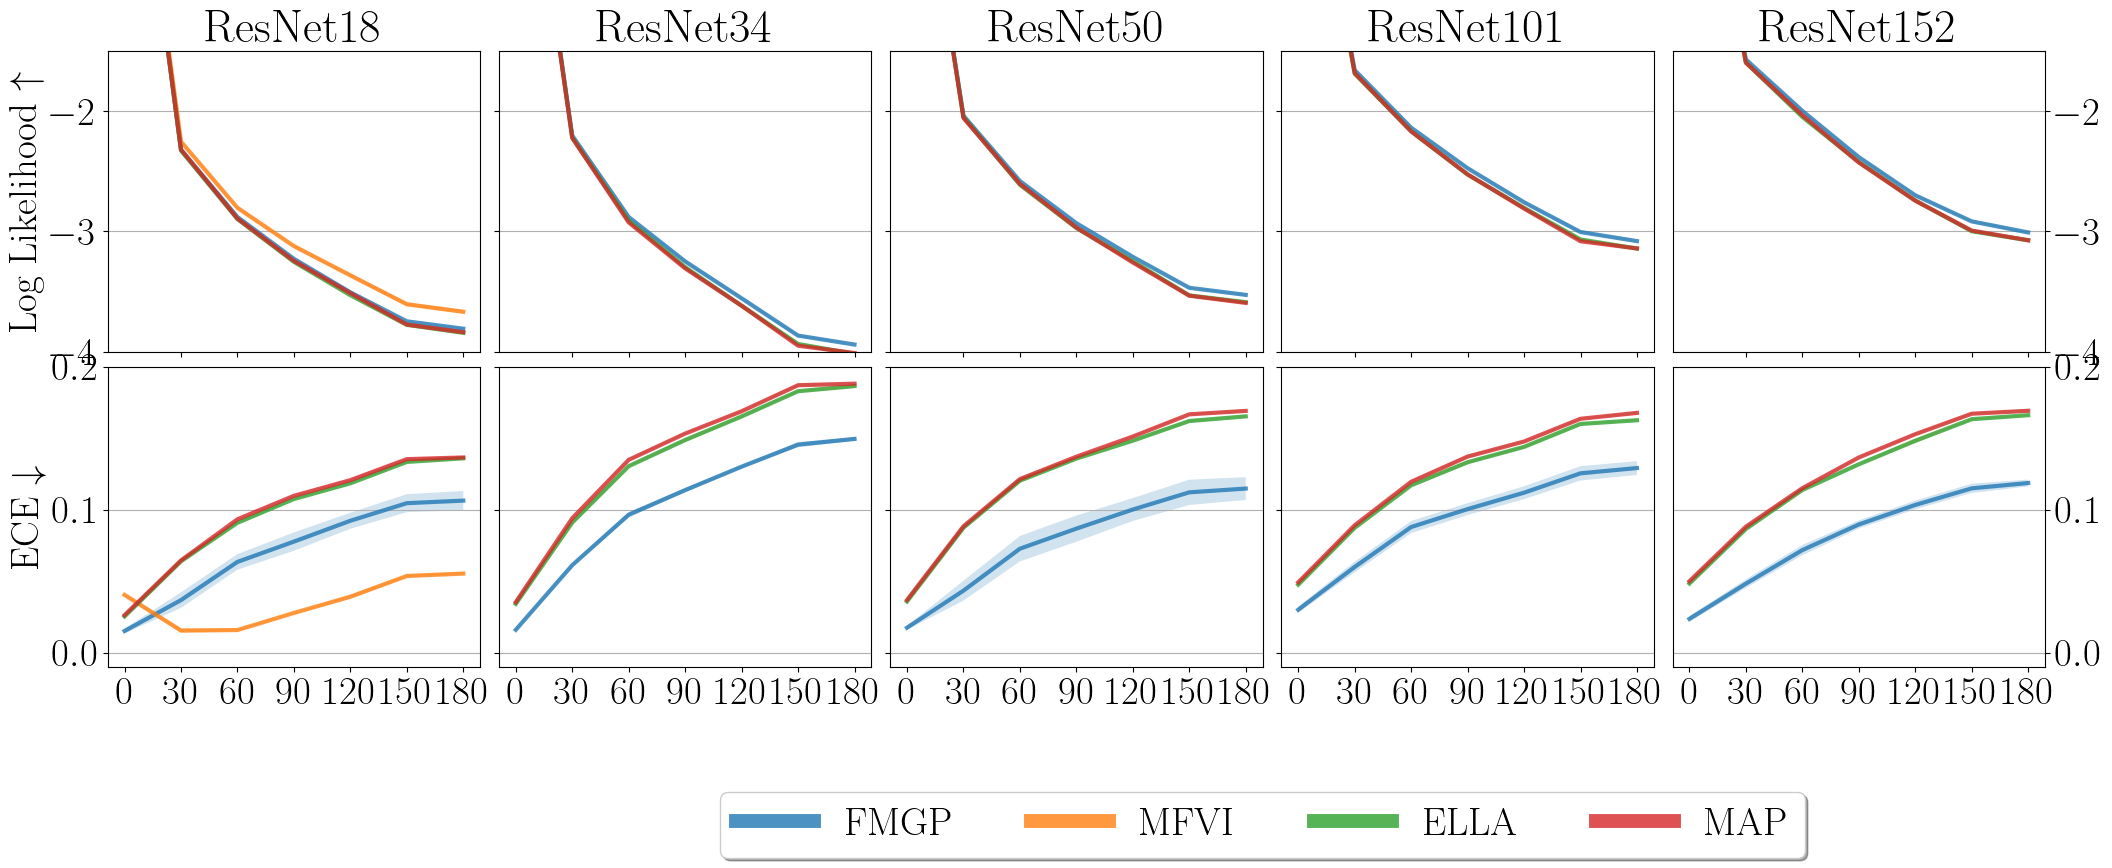

In [41]:
fig, axis = plt.subplots(2, 5, figsize=(25, 8))
plt.subplots_adjust(hspace=0.05, wspace=0.05)
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        try:
            # plot mean NLL
            mean = []
            std = []
            mean.append(df.loc[(resnet, method), "NLL"]["mean"])
            std.append(df.loc[(resnet, method), "NLL"]["std"])
            for angle in [30, 60, 90, 120, 150, 180]:
                mean.append(
                    -df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["mean"]
                )
                std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_NLL"]["std"])

            axis[0, i].plot(
                [0, 30, 60, 90, 120, 150, 180],
                mean,
                label=labels[j],
                linewidth=3,
                color=jet(j),
                alpha=0.8,
            )
            axis[0, i].fill_between(
                [0, 30, 60, 90, 120, 150, 180],
                np.array(mean) - 2 * np.array(std),
                np.array(mean) + 2 * np.array(std),
                alpha=0.2,
            )
        except:
            continue
    axis[0, i].set_ylim(-4, -1.5)
    axis[0, i].set_xticks([30, 60, 90, 120, 150, 180])
    axis[0, i].grid(axis="y")


axis[0, 0].set_xticklabels([])
axis[0, 1].set_xticklabels([])
axis[0, 1].set_yticklabels([])
axis[0, 2].set_xticklabels([])
axis[0, 2].set_yticklabels([])
axis[0, 3].set_xticklabels([])
axis[0, 3].set_yticklabels([])
axis[0, 4].set_xticklabels([])
axis[0, 4].yaxis.tick_right()


axis[0, 0].set_ylabel(r"Log Likelihood $\uparrow$")
axis[0, 0].set_title("ResNet18")
axis[0, 1].set_title("ResNet34")
axis[0, 2].set_title("ResNet50")
axis[0, 3].set_title("ResNet101")
axis[0, 4].set_title("ResNet152")
for i, resnet in enumerate(resnets):
    for j, method in enumerate(models):
        try:
            # plot mean NLL
            mean = []
            std = []
            mean.append(df.loc[(resnet, method), "ECE"]["mean"])
            std.append(df.loc[(resnet, method), "ECE"]["std"])

            for angle in [30, 60, 90, 120, 150, 180]:
                mean.append(
                    df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["mean"]
                )
                std.append(df.loc[(resnet, method), f"rotated_{int(angle)}_ECE"]["std"])

            axis[1, i].plot(
                [0, 30, 60, 90, 120, 150, 180],
                mean,
                label=labels[j],
                linewidth=3,
                color=jet(j),
                alpha=0.8,
            )
            axis[1, i].fill_between(
                [0, 30, 60, 90, 120, 150, 180],
                np.array(mean) - 2 * np.array(std),
                np.array(mean) + 2 * np.array(std),
                alpha=0.2,
            )
        except:
            continue
    # axis[1, i].set_title("ECE - Rotations " + resnet)
    axis[1, i].set_ylim(-0.01, 0.2)
    axis[1, i].set_xticks([0, 30, 60, 90, 120, 150, 180])
    axis[1, i].grid(axis="y")


axis[1, 1].set_yticklabels([])
axis[1, 2].set_yticklabels([])
axis[1, 3].set_yticklabels([])
axis[1, 4].yaxis.tick_right()

axis[1, 0].set_ylabel(r"ECE $\downarrow$")

# Legend outside plot
plt.legend(
    handles=[
        plt.Line2D([0], [0], color=jet(i), lw=10, alpha=0.8, label=labels[i])
        for i in range(len(models))
    ],
    loc="lower center",
    bbox_to_anchor=(-1.1, -0.7),
    ncol=4,
    fancybox=True,
    shadow=True,
)
plt.savefig("imagenet_rotations.pdf", bbox_inches="tight", dpi=200)
plt.show()